# Insurance Price Prediction Model

(1) **Objective:** *This notebook assesses the different factors involved in prediction of insurance prices and attempts to identify which of the given features are likely to be the most correlated to the final insurance price point.*

In [1]:
# Import key tools and libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

%matplotlib inline

(2) **Data:** *Import the data and assess its different elements and characteristics...*

* The dataset has been downloaded from Kaggle at the following address:
https://www.kaggle.com/datasets/thedevastator/prediction-of-insurance-charges-using-age-gender

In [2]:
ins = pd.read_csv("data/insurance_data/insurance.csv")
ins.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Check column data types
ins.dtypes

index         int64
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
ins.shape

(1338, 8)

In [5]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [6]:
ins.describe()

,index,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,0.000000,18.000000,15.960000,0.000000,1121.873900
25%,334.250000,27.000000,26.296250,0.000000,4740.287150
50%,668.500000,39.000000,30.400000,1.000000,9382.033000
75%,1002.750000,51.000000,34.693750,2.000000,16639.912515
max,1337.000000,64.000000,53.130000,5.000000,63770.428010


In [7]:
ins.isna().sum() # no missing values

index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
ins.duplicated().sum() # no duplicates

0

### *Use sns and mpl/plt to visualize the data: identify correlations and distribution patterns*

In [9]:
ins.head(20)

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
5,5,31,female,25.740,0,no,southeast,3756.62160
6,6,46,female,33.440,1,no,southeast,8240.58960
7,7,37,female,27.740,3,no,northwest,7281.50560
8,8,37,male,29.830,2,no,northeast,6406.41070
9,9,60,female,25.840,0,no,northwest,28923.13692


In [10]:
# Index column is unecessary
ins = ins.drop(columns="index", axis=1)

In [11]:
ins.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


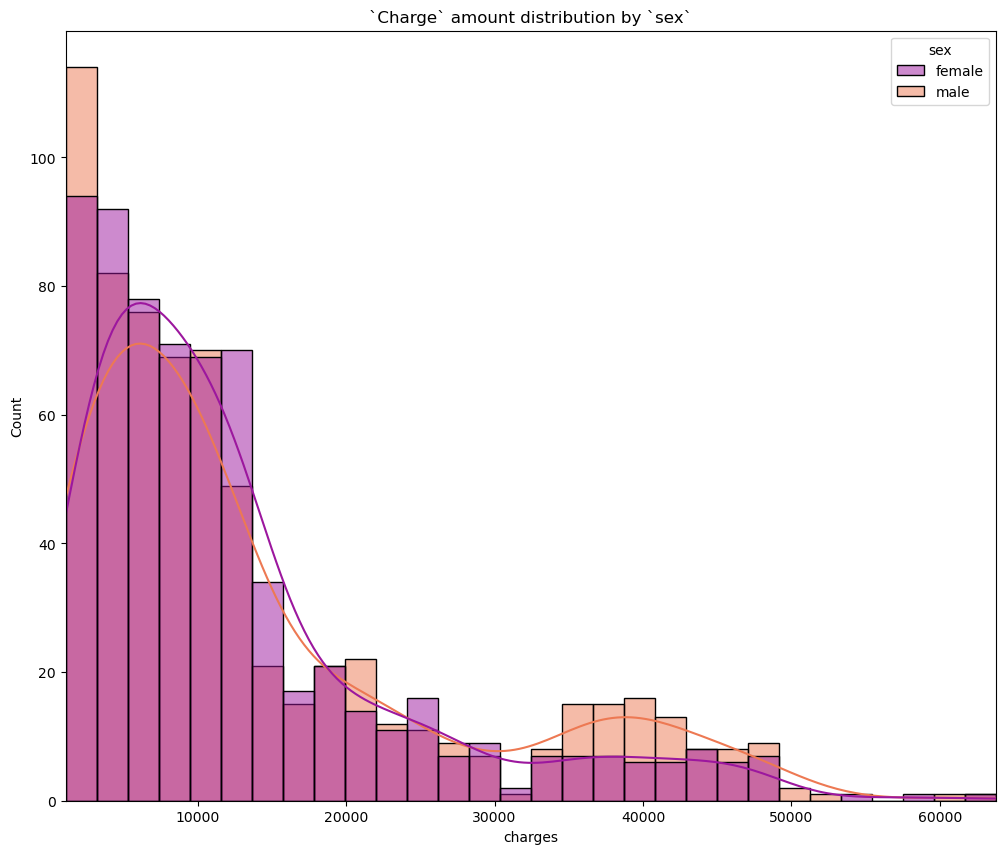

In [12]:
plt.figure(figsize=(12,10))
plt.title("`Charge` amount distribution by `sex`")
plt.xlim(ins.charges.min(), ins.charges.max())
sns.histplot(data=ins,
              x="charges",
              hue="sex",
             palette="plasma", kde=True);

* The above histogram suggests that women have a slightly higher likelihood of getting into smaller accidents, while as the charge amount grows it becomes more likely that men are involved in the incidents.

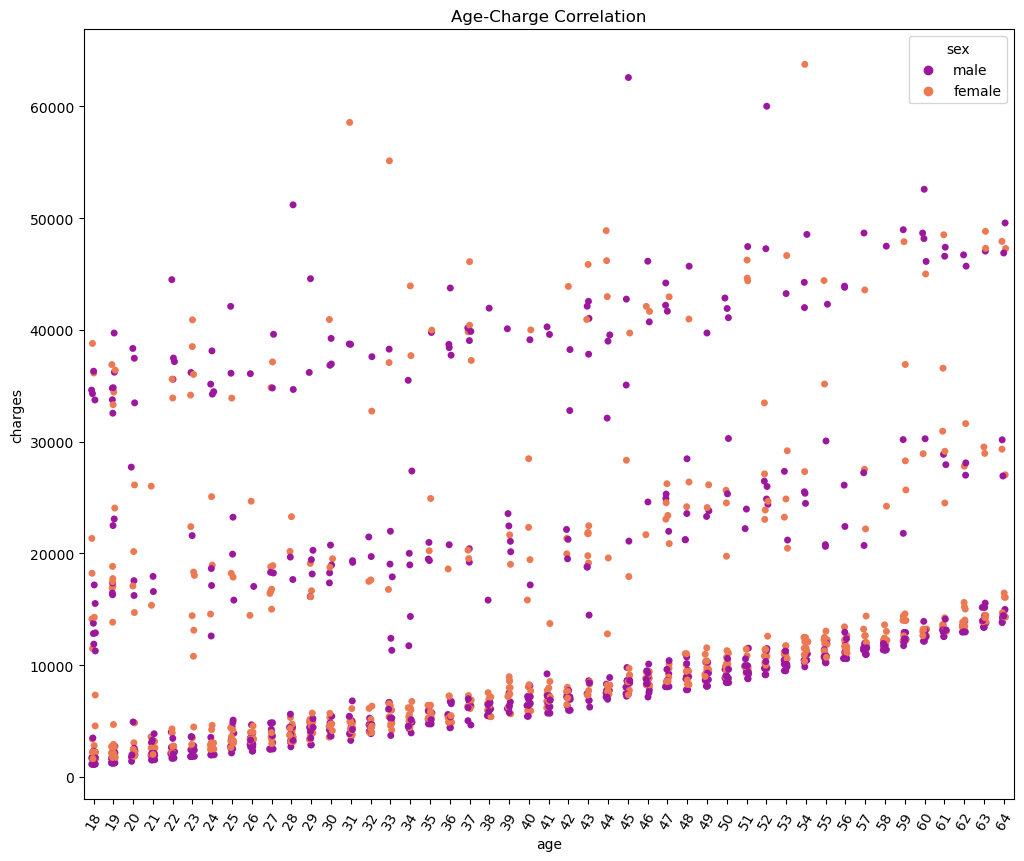

In [13]:
plt.figure(figsize=(12,10))
plt.title("Age-Charge Correlation")
plt.xticks(rotation=60)
sns.stripplot(x="age",
              y="charges",
             data=ins,
             hue="sex",
             palette="plasma",
             dodge=False);

* The above strip plot shows a strong correlation between the "age" feature and expected "charge" amount, particularly when it comes to amounts that are below 20,000.

In [14]:
unique_regions = ins.region.unique()
unique_regions

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

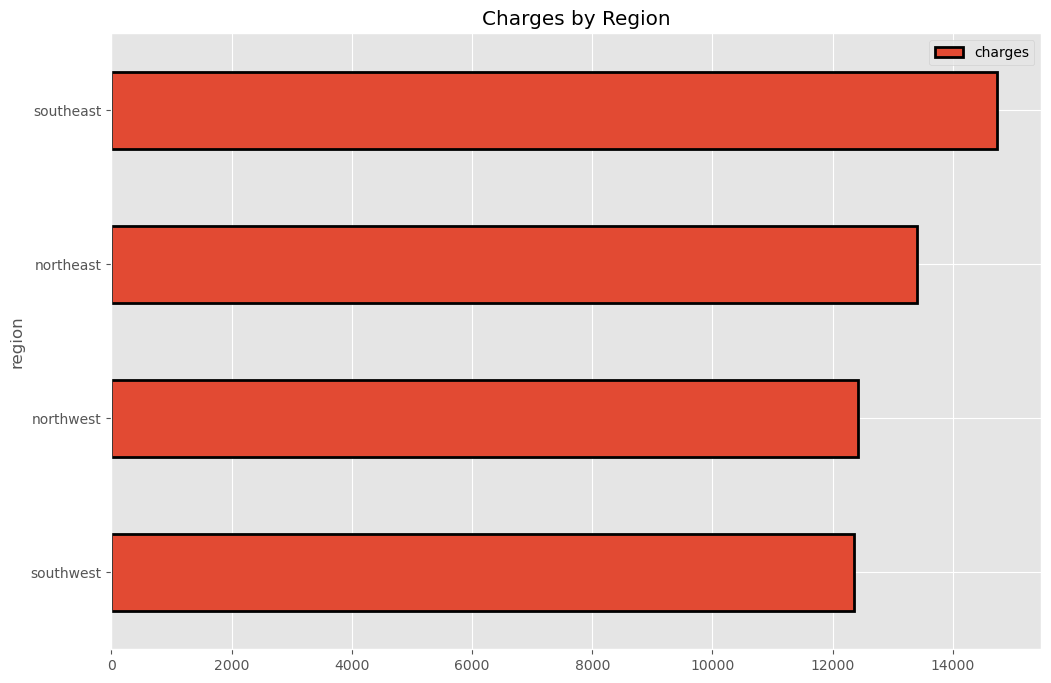

In [15]:
# Change seaborn style
plt.style.use('ggplot')

by_reg = pd.pivot_table(ins, index="region", values="charges")
by_reg = by_reg.sort_values(by="charges", ascending=True)
by_reg

plot = by_reg.plot(kind="barh", figsize=(12,8),
                   title="Charges by Region", legend=True, 
                   edgecolor="black", lw=2)

* Charge amounts are likely to be the highest in the southeast region, but other than this the general spread is not overly significant.

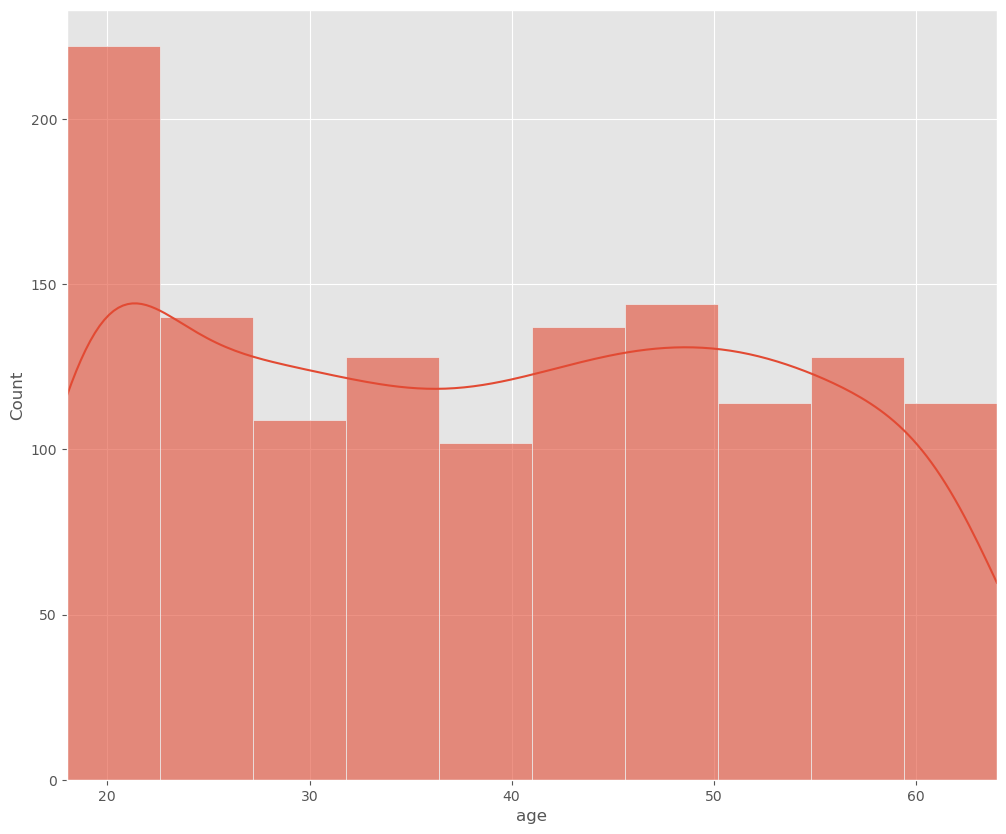

In [16]:
plt.figure(figsize=(12,10))
plt.xlim(18, 64)
sns.histplot(ins["age"], bins=10, kde=True, alpha=0.6);

* Ages 18-23 are clearly the leading group in generating claims, irrespective of the charge amount incurred or the gender of the one incurring the charge.

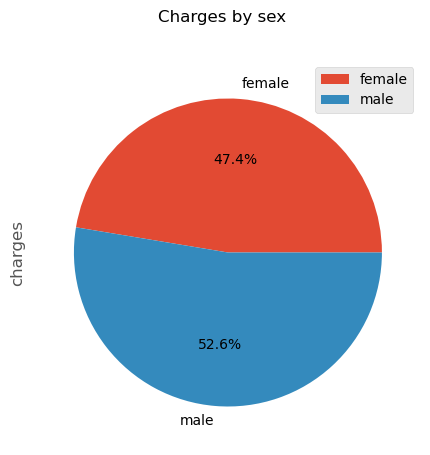

In [17]:
# Check overall % of charges by "sex"
sex = pd.pivot_table(ins, index="sex", values="charges")
sex.plot.pie(figsize=(5,5), subplots=True,
             autopct='%1.1f%%', title="Charges by sex");

* Males have a noticeable but unremarkable frequency of involvement in insurance charges, according to the data. Time to assess whether any correlations exist between the `smoking`, `children`, or `bmi` features and the target value, `charges`.

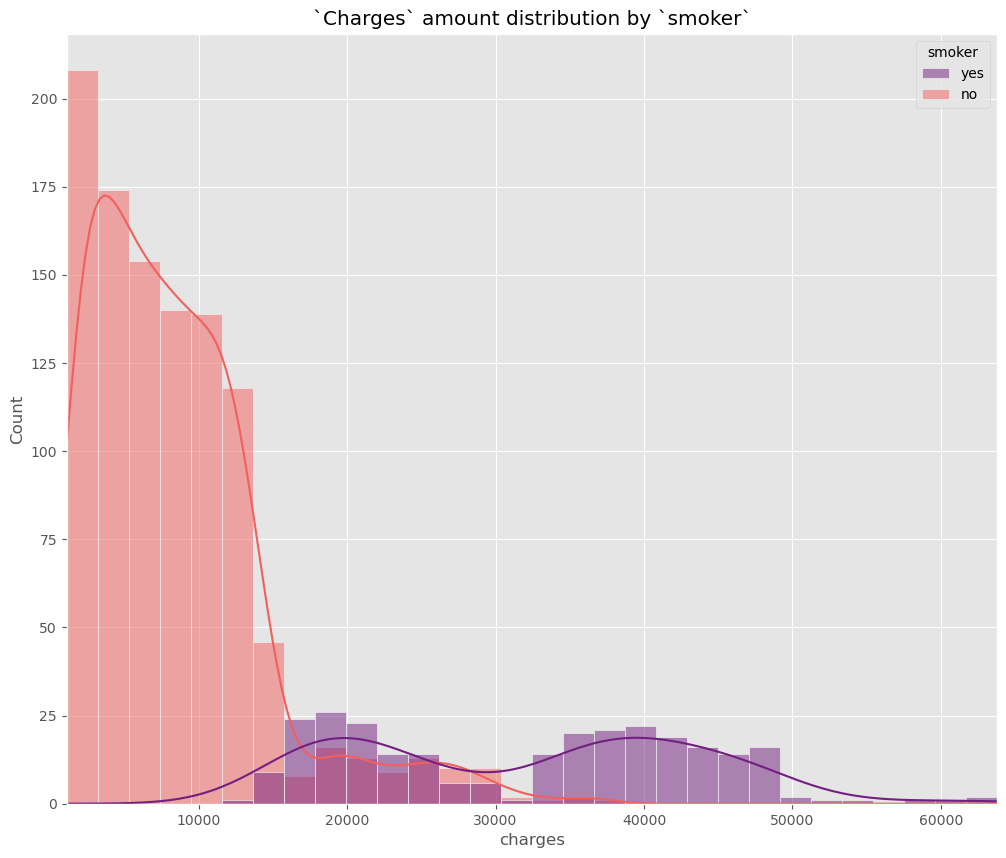

In [18]:
# Determine if any correlation exists between smokers and charges
plt.figure(figsize=(12,10))
plt.title("`Charges` amount distribution by `smoker`")
plt.xlim(ins.charges.min(), ins.charges.max())
sns.histplot(data=ins,
              x="charges",
              hue="smoker",
             palette="magma", kde=True);

* A near-dichotomous correlation exists between smokers and non-smokers: a negligible amount of non-smokers incur insurance charges of above 15k, while the minimum charge amount for smokers appears to begin at 10k and climb until only smokers are incurring charges of 30-35k+.

In [19]:
ins.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [280]:
ins.children.min(), ins.children.max()

(0, 5)

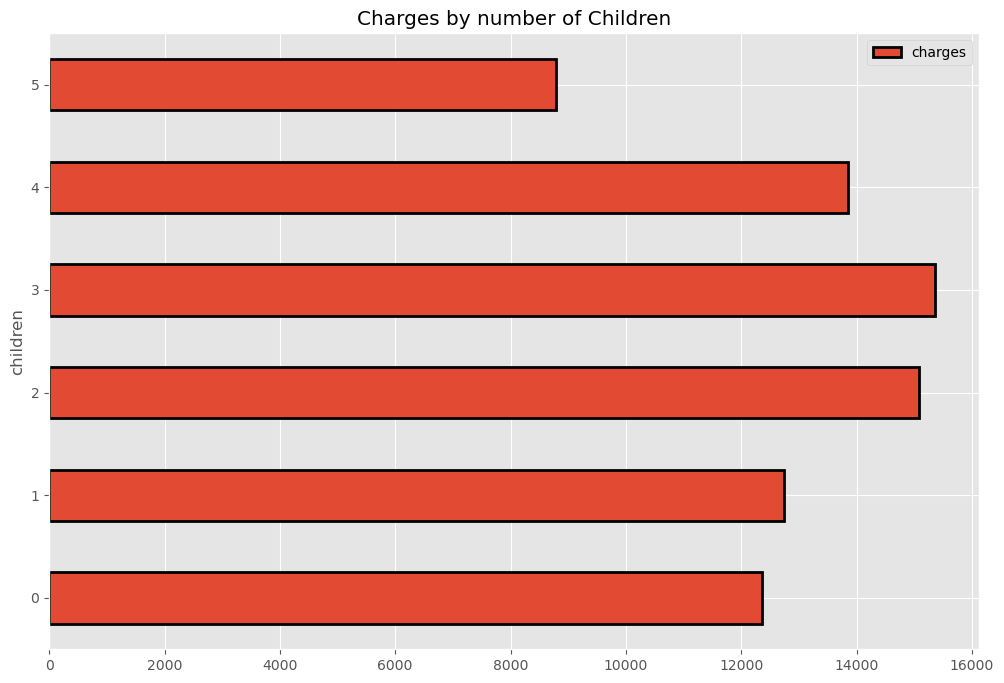

In [20]:
plt.style.use('ggplot')

by_children = pd.pivot_table(ins, index="children", values="charges")
by_children = by_children.sort_values(by="children", ascending=True)
by_children

plot = by_children.plot(kind="barh", figsize=(12,8),
                   title="Charges by number of Children", legend=True, 
                   edgecolor="black", lw=2)

* Surprisingly, after 3 children there seems to be a negative correlation between number of children and charge amount. Though there are some standout values here, number of children still does not seem to have the same weight on prediction of the target amount as the `smoker` feature did. Let's move on to our final metric, `bmi`.

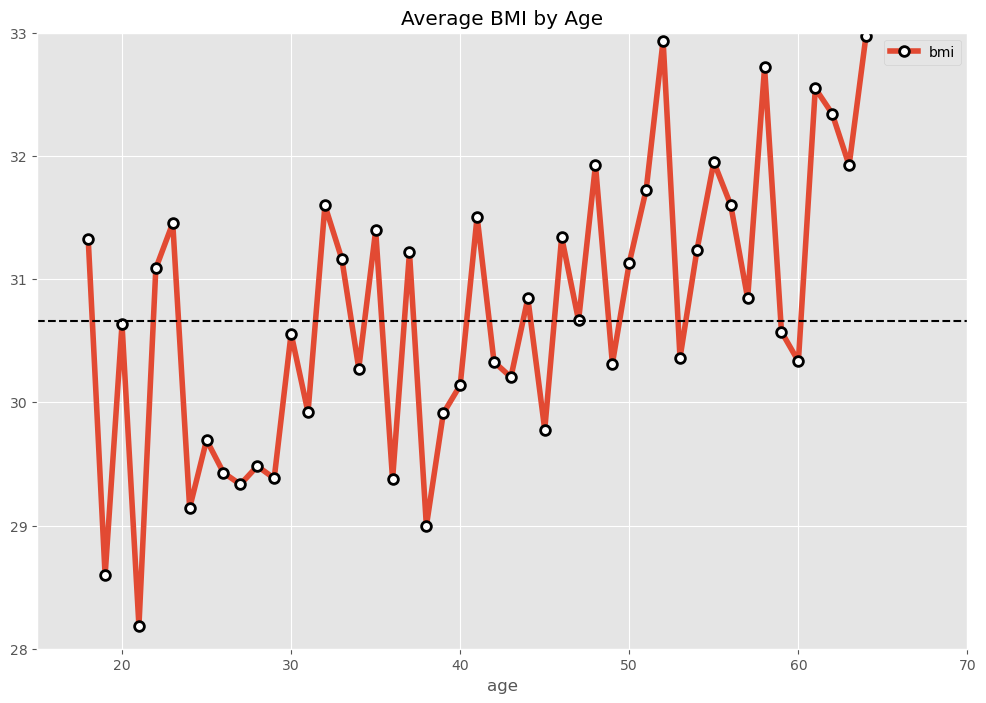

In [21]:
plt.style.use('ggplot')

bmi = pd.pivot_table(ins, index="age", values="bmi", aggfunc="mean")
bmi.plot(kind="line", figsize=(12,8), lw=4, marker="o",
         markersize=7, markerfacecolor="white",
         markeredgecolor="black", markeredgewidth=2)
plt.title("Average BMI by Age")
plt.xlim(15, 70)
plt.ylim(28, 33)
plt.axhline(y=ins.bmi.mean(), ls="--", color="black")

* The average bmi has an obvious upward trend, meaning that as age increases the individuals in question are generally less healthy. This necessitates a reminder of an above figure to explore whether age (particularly higher ages, with BMI as a stand-in for general health) was correlated to higher charge amounts...

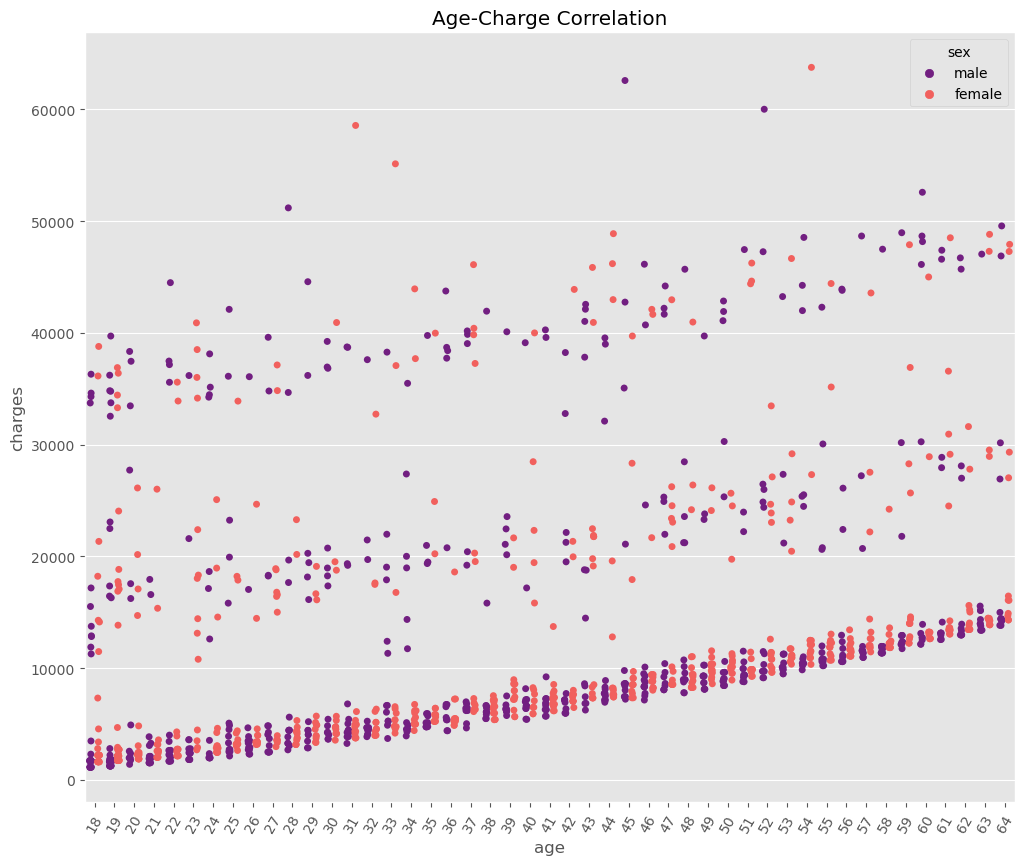

In [22]:
# Replot figure from further up illustrating impact of age on charge amount
# dodge has been set to 'True' in this iteration, though it has minimal impact
plt.figure(figsize=(12,10))
plt.title("Age-Charge Correlation")
plt.xticks(rotation=60)
sns.stripplot(x="age",
              y="charges",
             data=ins,
             hue="sex",
             palette="magma",
             dodge=True);

Again, a clear correlation can be seen between age and charge amount regardless of gender, especially as these individuals begin to approach their 60's.

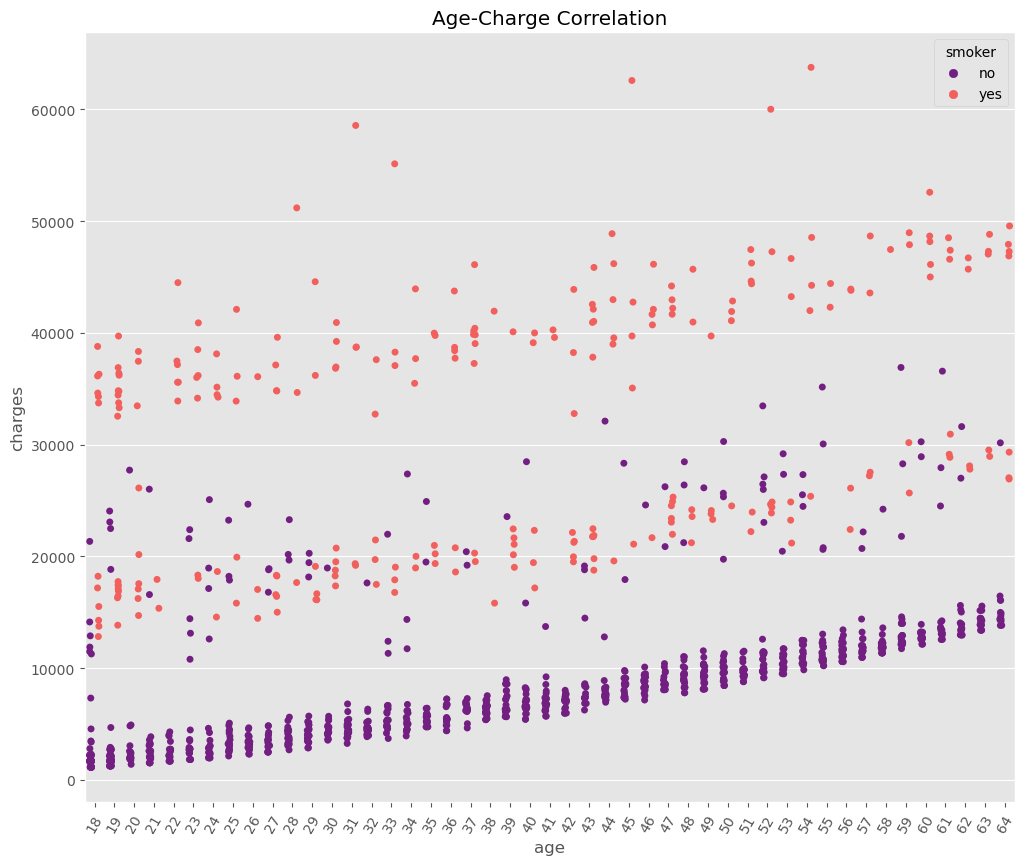

In [23]:
plt.figure(figsize=(12,10))
plt.title("Age-Charge Correlation")
plt.xticks(rotation=60)
sns.stripplot(x="age",
              y="charges",
             data=ins,
              hue="smoker",
             palette="magma",
             dodge=True);

* Finally, we can see that, irrespective of even the age feature, if someone is classified as a smoker they are likely (almost guaranteed, according to the data) to incur insurance charges 2-3+ times the average in a given age group.

#### Identify numerical correlations in the data

In [24]:
# Create copy of ins DataFrame to factorize categorical data
cp_ins = ins.copy()

In [286]:
cp_ins.corr()

C:\Users\willh\AppData\Local\Temp\ipykernel_20680\113173292.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cp_ins.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


C:\Users\willh\AppData\Local\Temp\ipykernel_60096\2708023512.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cp_ins.corr(), annot=True, cmap="plasma");


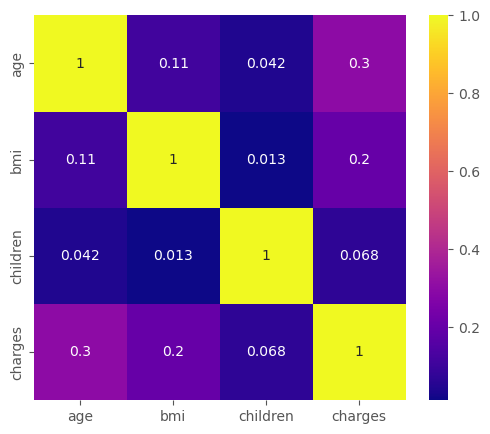

In [25]:
# Plot numerical correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cp_ins.corr(), annot=True, cmap="plasma");

As can be seen above, as far as numerical values go, age and charges do indeed have the highest correlation. However this does not take into account the categorical values included in the data features: "sex", "smoker", and "region".

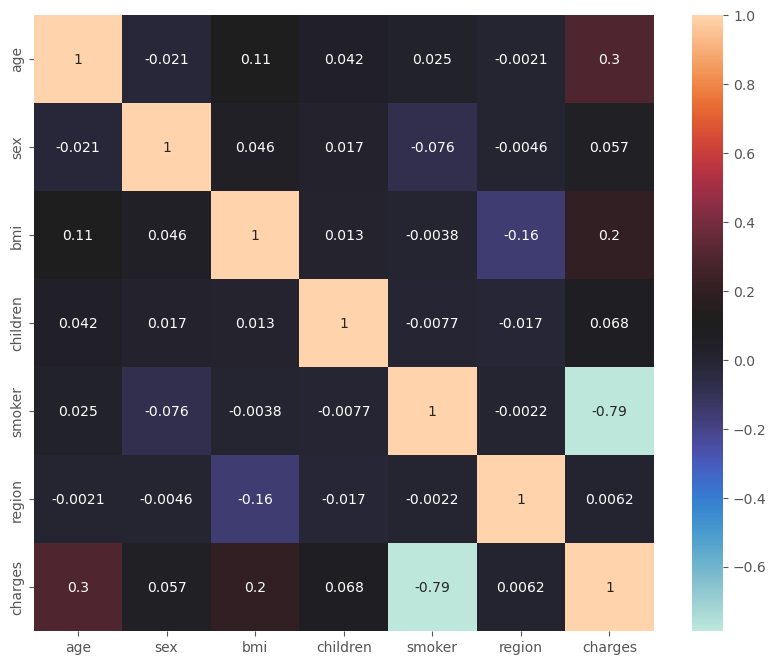

In [26]:
# Turn categorical values into numerical values...
cp_ins["sex"]=pd.factorize(cp_ins.sex)[0]
cp_ins["smoker"]=pd.factorize(cp_ins.smoker)[0]
cp_ins["region"]=pd.factorize(cp_ins.region)[0]

plt.figure(figsize=(10,8))
sns.heatmap(cp_ins.corr(), annot=True, cmap="icefire");

* The `smoker` category clearly has the largest (negative) correlation with respect to the target feature `charges`. This concludes the data analysis section - let's build a machine learning model now.

* *Although the smoker category has the heaviest weight when it comes to 'charges' values, there are countless underlying factors that cannot be accounted for in this dataset. Therefore, a model that can score between 0.85-0.95 on its predictions (85-95% accuracy) should be a sufficiently reliable model for our purposes.*

(3) **Machine Learning Model:** Build a model that takes into account the above figures and notes in order to make predictions with > 85% accuracy. 

In [27]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
from math import sqrt

In [28]:
# Split data and confirm the right shapes
x = cp_ins.drop("charges", axis=1)
y = cp_ins["charges"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [29]:
# Instantiate GradientBoosterRegressor model
reg_booster = GradientBoostingRegressor()

In [30]:
# Define model and set tentative hyperparams
model = reg_booster

n_estimators = [100, 300, 500, 900, 1500]
max_depth = [2, 3, 5, 10, 15]
learning_rate = [0.05, 0.1, 0.2, 0.3]
max_features = [2, 4, 6, 8, 10]

# Create hyperparams dictionary to pass into RandomizedSearchCV below
hyperparams = {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "learning_rate": learning_rate,
    "max_features": max_features
}

In [31]:
rscv = RandomizedSearchCV(estimator=reg_booster,
                         param_distributions=hyperparams,
                         cv=5, n_iter=100,
                         scoring="neg_mean_absolute_error", n_jobs=4,
                         verbose=True,
                         return_train_score=True)

In [32]:
rscv.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=4,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2, 0.3],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'max_features': [2, 4, 6, 8, 10],
                                        'n_estimators': [100, 300, 500, 900,
                                                         1500]},
                   return_train_score=True, scoring='neg_mean_absolute_error',
                   verbose=True)

In [306]:
# Find the best parameters
rscv.best_params_

{'n_estimators': 300, 'max_features': 8, 'max_depth': 2, 'learning_rate': 0.05}

In [33]:
reg_booster = GradientBoostingRegressor(n_estimators=300,
           max_features=8,
           max_depth=2,
           learning_rate=0.05)

reg_booster.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, max_features=8,
                          n_estimators=300)

In [35]:
# Make predictions with the model
y_preds = reg_booster.predict(x_test)
y_preds[:50]

array([14370.48547956,  4286.27539618,  6126.73366727,  3433.54110609,
       14449.16327974, 40608.55644149,  4296.31415696, 14721.71952246,
       12324.30736309,  7905.02192989,  4131.35735456,  8281.06831131,
        7326.2510356 , 14575.91055525, 28827.38906681, 15623.31199231,
        6178.53759733, 15828.67220029, 41188.29658618,  6271.78184228,
        2813.70671062, 22415.99581352,  8871.99252331, 13774.85723707,
       12726.90105759,  4120.93722813, 19986.79782532, 33897.47462731,
       16992.61175166, 15551.1069578 , 14442.25568083, 11376.47307991,
       10537.77781418,  5777.24876183, 42923.86540704,  4503.27554625,
        6805.59611777,  2111.31798597, 10520.021513  , 10413.67335393,
        2618.98432401,  9366.53496935, 18147.49321076,  3312.86798854,
       11260.46912126,  3865.33690202, 43083.49273703,  2922.92554198,
        8041.36911462,  6714.54426024])

In [36]:
# Find the R2, RMSE scores
r2 = r2_score(y_test, y_preds)
rmse = sqrt(mean_squared_error(y_test, y_preds))

r2, rmse

(0.867836929190084, 3954.94182445476)

#### Score the model on the training data

In [37]:
reg_booster.score(x_test, y_test)

0.867836929190084

The model has barely made our threshold of 85%. The model could (probably should) be improved a fair amount.

#### Appendix: Plotting Model Accuracy

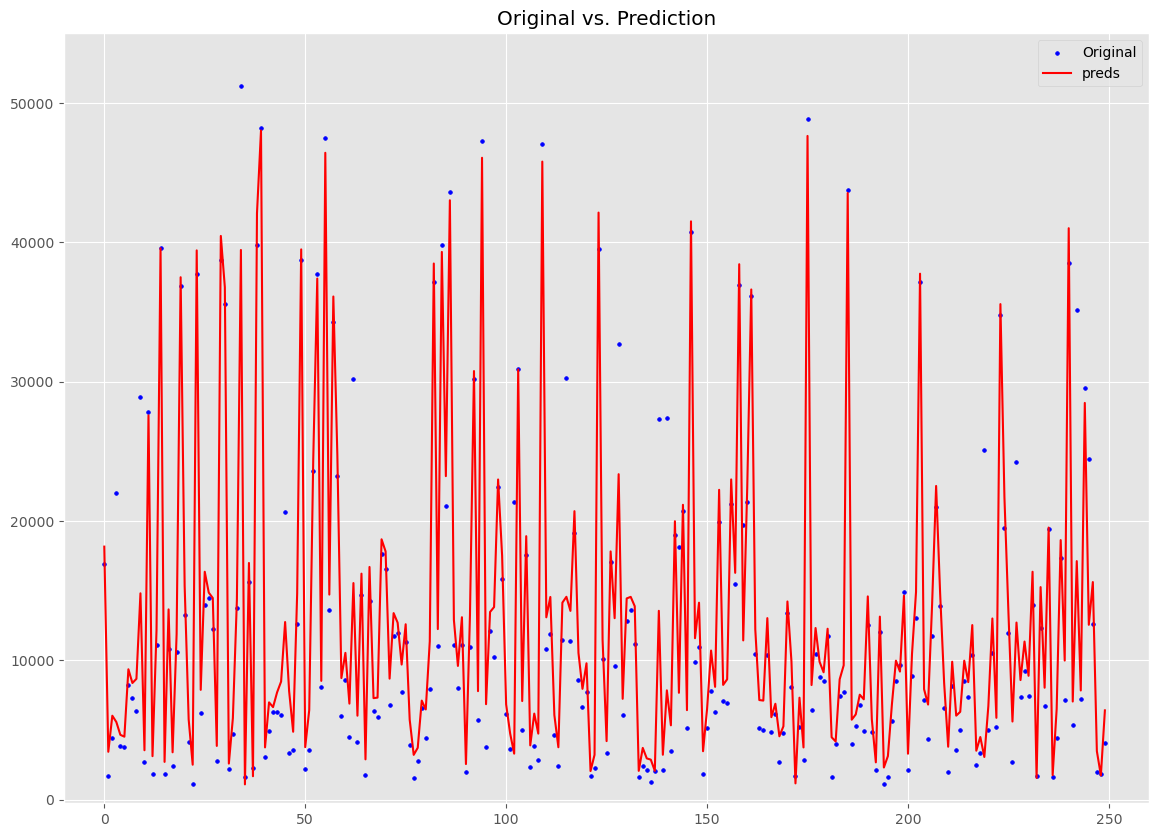

In [38]:
cp_ins["preds"] = reg_booster.predict(x)

x_ax = range(len(cp_ins["preds"].head(250)))
plt.figure(figsize=(14,10))
plt.title("Original vs. Prediction")
plt.scatter(x_ax, cp_ins["charges"].head(250),
            s=7, color="blue",  label="Original")
plt.plot(x_ax, cp_ins["preds"].head(250),
         lw=1.5, color="red", label="preds")
plt.xlim(-10, 260)
plt.ylim(-250, 55000)
plt.legend()
plt.show()

Any feedback or suggestions are welcome...

# *Thank you!*